In [1]:
#Example Problem-RandomForest-DiscriWinston

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import precision_score,recall_score
import itertools
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
import os

In [4]:
os.chdir("D:/WORK/Great Lakes/5th Term/PAM/Dataset")

In [5]:
#Reading the file
mydata=pd.read_csv("DiscriWinston.csv")
mydata.head()

,Person,Income,InvestAmt,WSJSubscriber
0,1,66.4,26.9,No
1,2,68.0,7.1,No
2,3,54.9,21.5,No
3,4,50.6,19.3,No
4,5,54.1,16.7,No


In [6]:
Y=mydata["WSJSubscriber"]
X=mydata.iloc[:,1:3]
print(mydata.head())

   Person  Income  InvestAmt WSJSubscriber
0       1    66.4       26.9            No
1       2    68.0        7.1            No
2       3    54.9       21.5            No
3       4    50.6       19.3            No
4       5    54.1       16.7            No


In [7]:
radom_clf=RandomForestClassifier(max_depth=20,n_estimators=10,random_state=2)
radom_clf.fit(X,Y)

RandomForestClassifier(max_depth=20, n_estimators=10, random_state=2)

In [8]:
prediction=radom_clf.predict(X)
prediction
Prediction=pd.DataFrame(prediction)
Prediction["WSJSubscriber"]=Prediction
Prediction["WSJSubscriber"][Prediction["WSJSubscriber"]=="Yes"]=1
Prediction["WSJSubscriber"][Prediction["WSJSubscriber"]=="No"]=0
Prediction
Prediction=Prediction.iloc[:,1]

In [9]:
pred_prob=radom_clf.predict_proba(X)
pred_prob=pd.DataFrame(pred_prob)
print(pred_prob)
pred_class=(pred_prob[1]>=0.5).astype(np.int)

      0    1
0   1.0  0.0
1   1.0  0.0
2   1.0  0.0
3   1.0  0.0
4   0.9  0.1
..  ...  ...
79  0.0  1.0
80  0.2  0.8
81  0.1  0.9
82  0.0  1.0
83  0.0  1.0

[84 rows x 2 columns]


<AxesSubplot:>

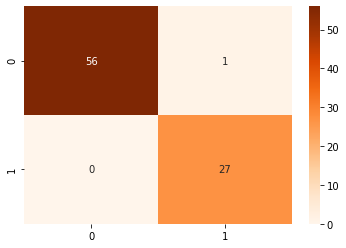

In [10]:
cm=confusion_matrix(Y,prediction)
sns.heatmap(cm,annot=True,cmap="Oranges")

In [11]:
from sklearn.metrics import classification_report
Report=classification_report(Y,prediction)
print((Report))

              precision    recall  f1-score   support

          No       1.00      0.98      0.99        57
         Yes       0.96      1.00      0.98        27

    accuracy                           0.99        84
   macro avg       0.98      0.99      0.99        84
weighted avg       0.99      0.99      0.99        84



In [12]:
importances=radom_clf.feature_importances_
importances
importances=pd.DataFrame(importances)
Importance=importances.transpose()
Importance.columns=["Income","InvestAmt"]
Importance

,Income,InvestAmt
0,0.342188,0.657812


In [13]:
from sklearn.model_selection import GridSearchCV
tuned_parameters=[{"n_estimators":[10,20],
                  "max_depth":range(10,20),
                   "max_features":["sqrt",0.2]}]
radom_clf=RandomForestClassifier()
clf=GridSearchCV(radom_clf,
                tuned_parameters,
                cv=10,
                scoring="roc_auc")
clf.fit(X,Y)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': range(10, 20),
                          'max_features': ['sqrt', 0.2],
                          'n_estimators': [10, 20]}],
             scoring='roc_auc')

In [14]:
clf.best_score_

1.0

In [15]:
clf.best_params_

{'max_depth': 18, 'max_features': 0.2, 'n_estimators': 20}

In [16]:
mydata["WSJSubscriber"][mydata["WSJSubscriber"]=="Yes"]=1
mydata["WSJSubscriber"][mydata["WSJSubscriber"]=="No"]=0
Y=mydata["WSJSubscriber"]
Y

0     0
1     0
2     0
3     0
4     0
     ..
79    1
80    1
81    1
82    1
83    1
Name: WSJSubscriber, Length: 84, dtype: object

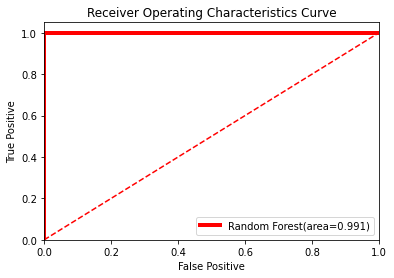

In [17]:
from sklearn.metrics import(roc_auc_score,roc_curve)
Y.head()
pred_class
rf_auc=roc_auc_score(Y.astype(int),pred_class)
fpr,tpr,thresholds=roc_curve(Y.astype(int),pred_prob[1])
plt.figure()
plt.plot(fpr,tpr,label="Random Forest(area=%0.3f)" % rf_auc,lw=4,color="red")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("Receiver Operating Characteristics Curve")
plt.legend(loc="lower right")
plt.show()